In [81]:
## 필요한 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
## 데이터 불러오기

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sampleSubmission.csv')

print(train_df.shape, test_df.shape)
print(train_df.columns)

(10886, 12) (6493, 9)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [83]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [84]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [85]:
print(train_df.info(), end = '\n\n')
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      

In [86]:
train_df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [87]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df.head()

train_df = train_df.drop(['minute', 'second'], axis=1)

In [88]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

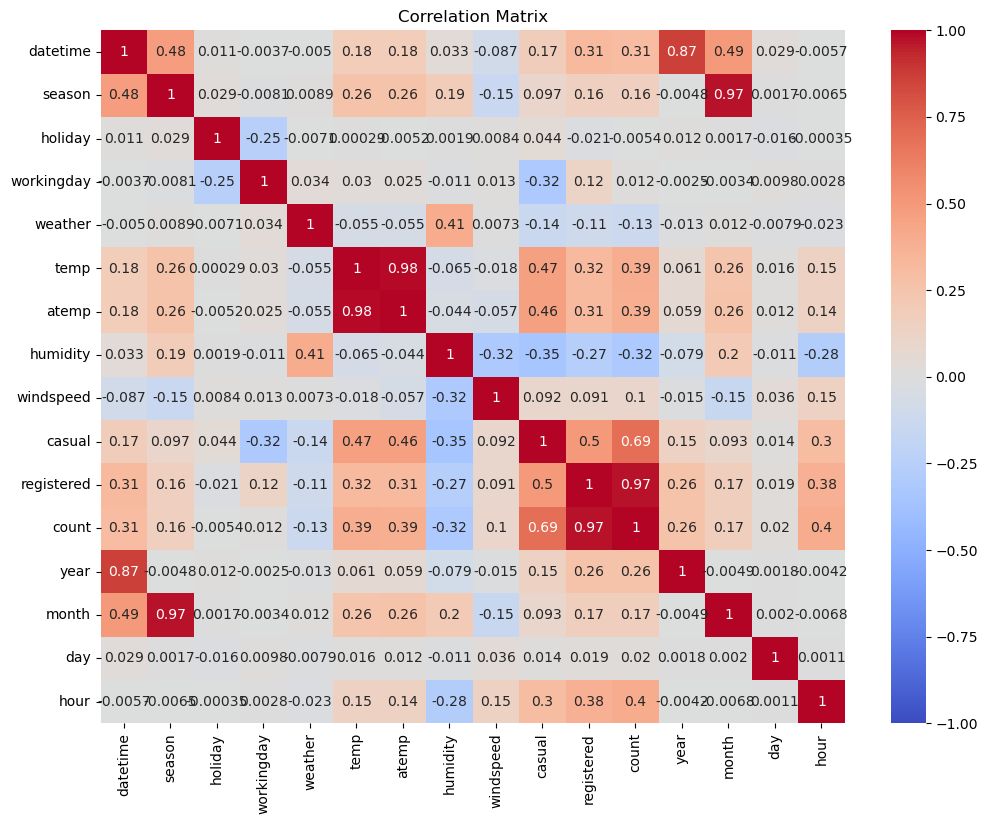

In [89]:
# 상관계수 히트맵 그리기

df = pd.DataFrame(train_df)
corr_matrix = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


- 온도가 높을수록 체감온도가 높다.
- 습도가 높은수록 대여량이 낮아지는 경향이 있다. 
- 자전거 대여량은 시간의 영향을 많이 받는다.

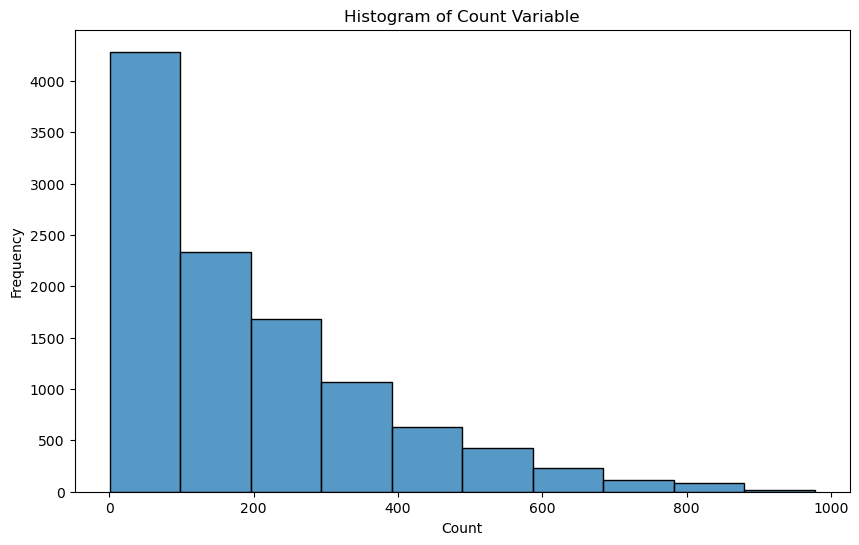

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(data = train_df, x='count', bins=10)
plt.title('Histogram of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

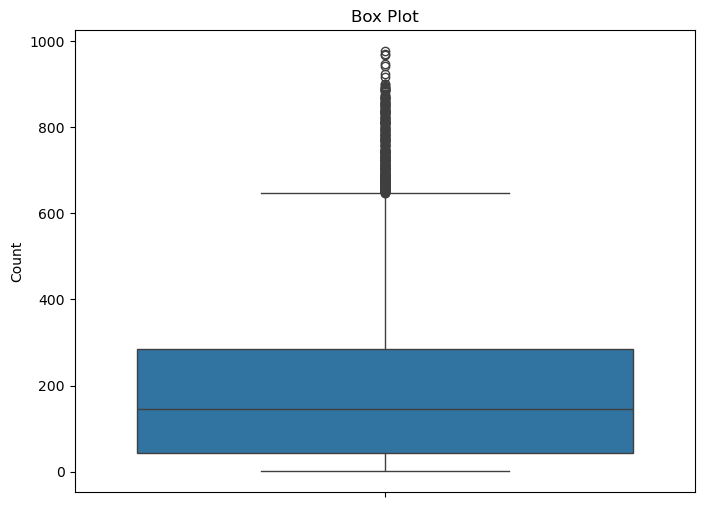

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, y = 'count')
plt.title('Box Plot')
plt.ylabel('Count')
plt.show()

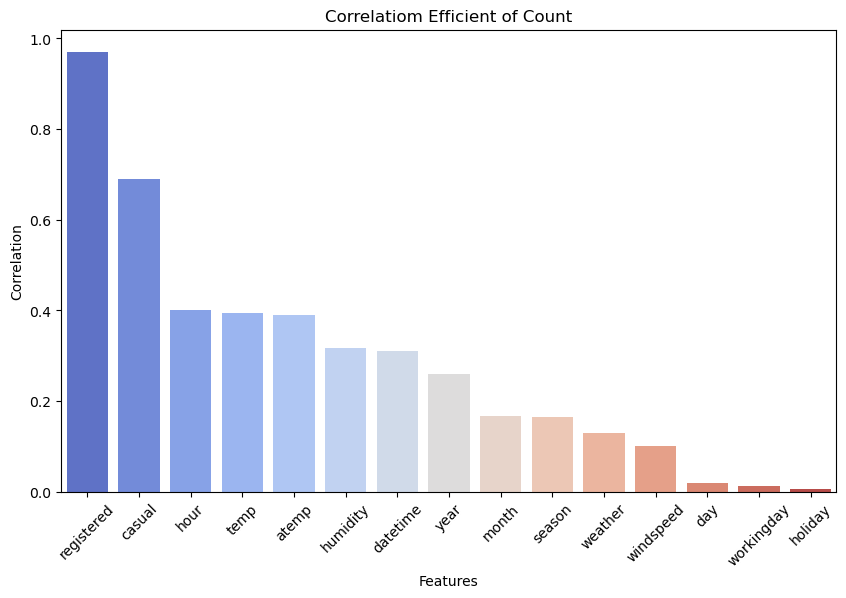

In [92]:
# count와 관련있는 변수 찾기
## 상관계수가 높은 순으로 막대그래프 시각화

corr_df = corr_matrix['count'].abs().sort_values(ascending=False).drop('count')

plt.figure(figsize=(10,6))
sns.barplot(data = corr_df.reset_index(), x='index', y='count', hue='index', palette='coolwarm')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlatiom Efficient of Count')
plt.xticks(rotation=45)
plt.show()

In [93]:
corr_df.reset_index()

,index,count
0,registered,0.970948
1,casual,0.690414
2,hour,0.400601
3,temp,0.394454
4,atemp,0.389784
5,humidity,0.317371
6,datetime,0.310187
7,year,0.260403
8,month,0.166862
9,season,0.163439


In [94]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


<Axes: xlabel='month', ylabel='count'>

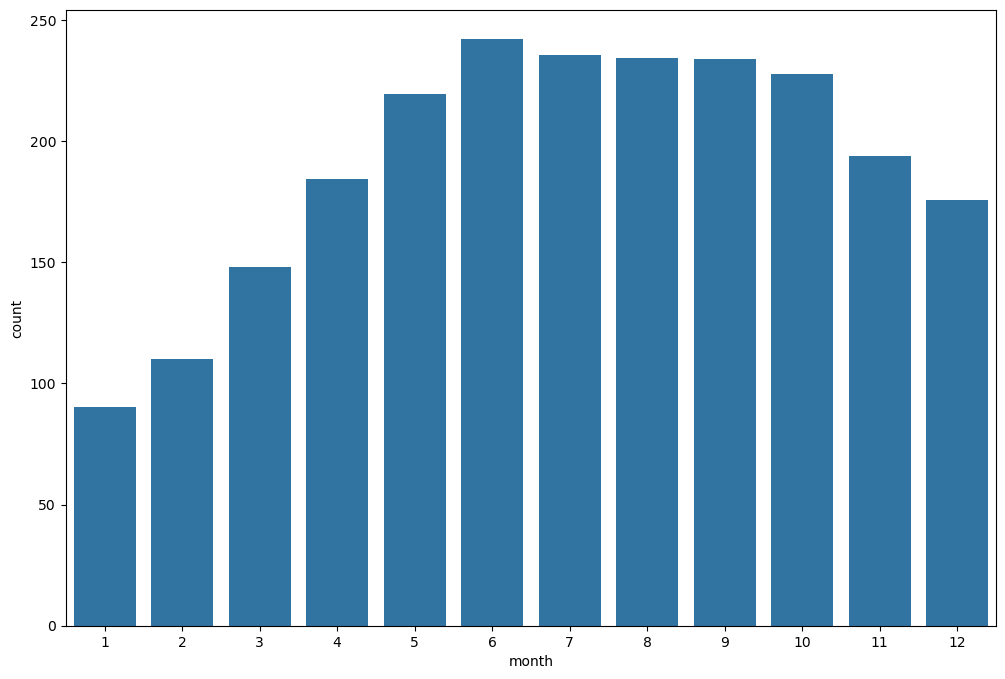

In [95]:
## 시각화

plt.figure(figsize = (12, 8))
sns.barplot(data=train_df, x='month', y='count', errorbar=None)

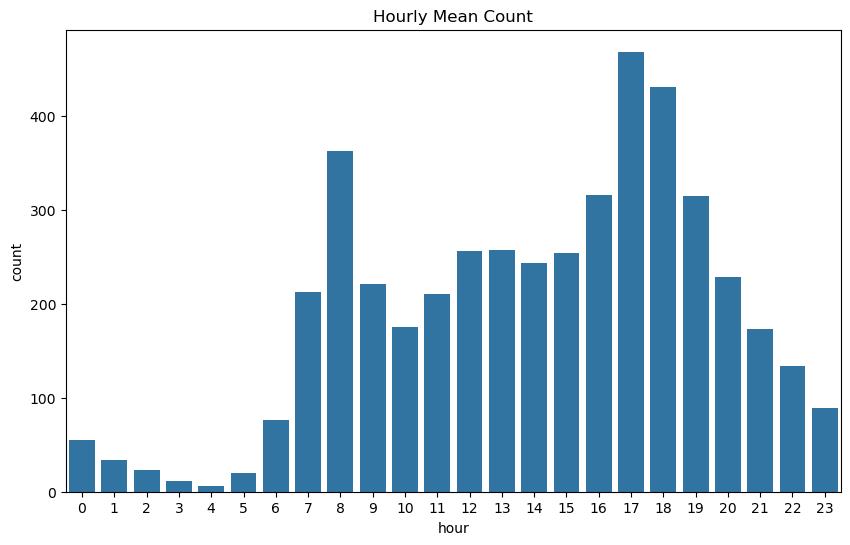

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(data = train_df, x='hour', y='count', errorbar=None)
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Hourly Mean Count')
plt.show()

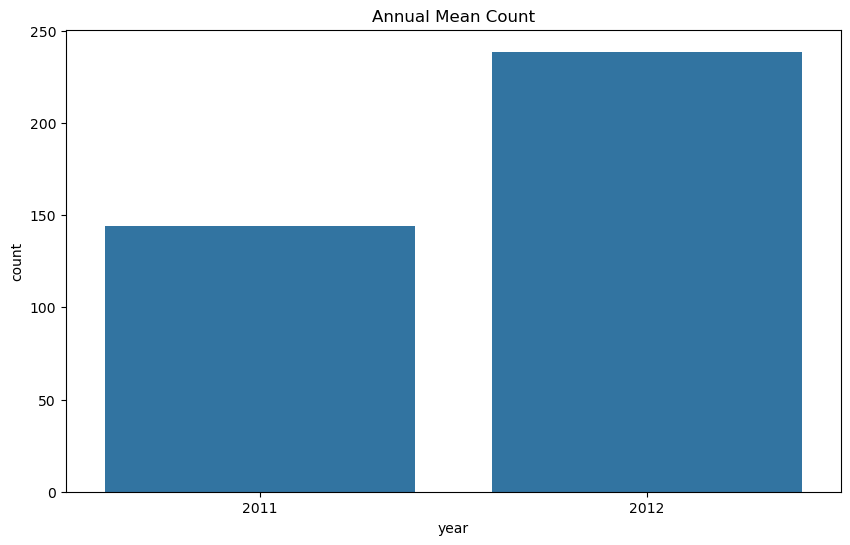

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count', errorbar=None, data=df)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Annual Mean Count')
plt.show()

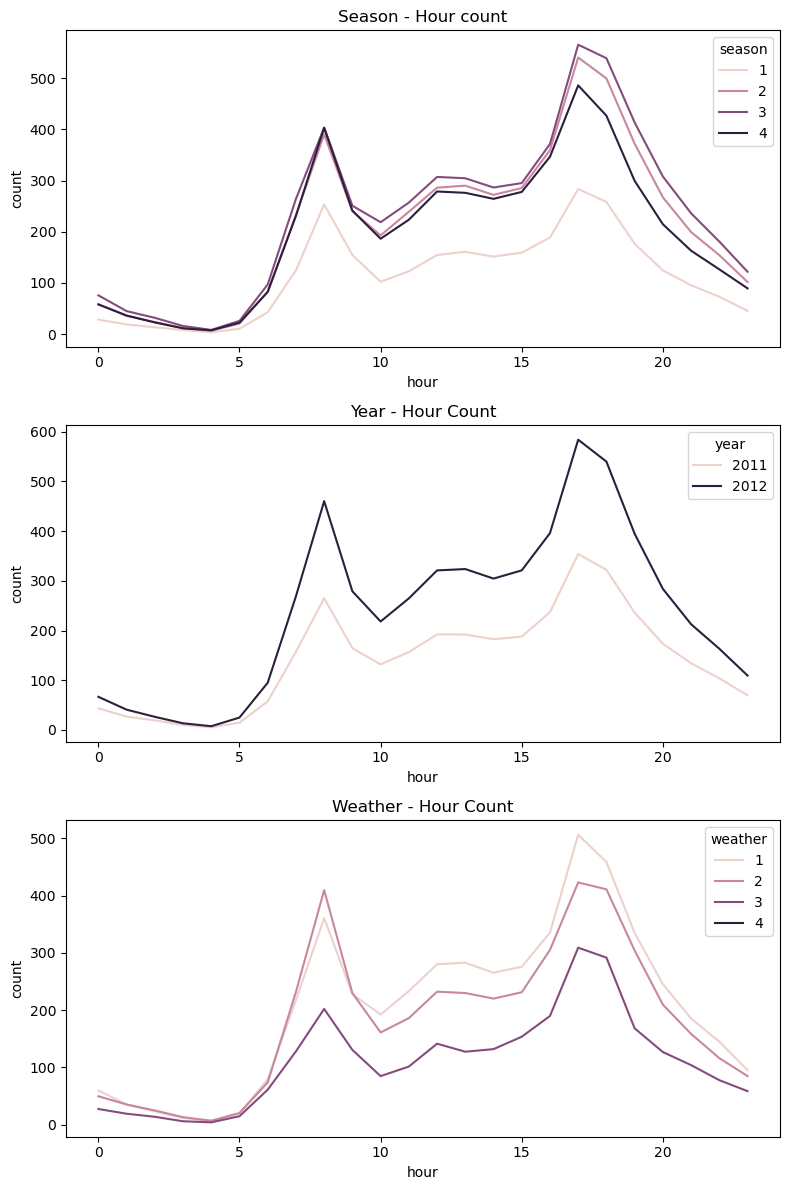

In [98]:
## 계절과 연도기준 그래프

fig, axes = plt.subplots(3, 1, figsize = (8, 12))

sns.lineplot(data = df, x='hour', y='count', hue='season', errorbar=None, ax=axes[0])
sns.lineplot(data = df, x = 'hour', y='count', hue='year', errorbar=None, ax = axes[1])
sns.lineplot(data = df, x = 'hour', y = 'count', hue='weather', errorbar=None, ax= axes[2])

axes[0].set_title('Season - Hour count')
axes[1].set_title('Year - Hour Count')
axes[2].set_title('Weather - Hour Count')

plt.tight_layout()
plt.show()

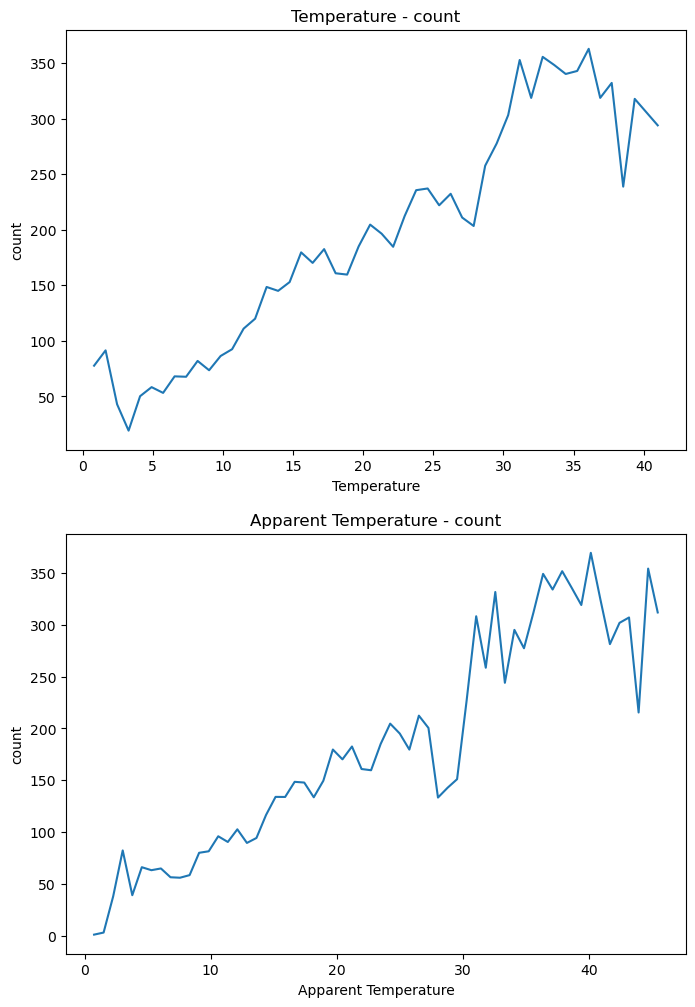

<Figure size 1000x600 with 0 Axes>

In [99]:
# 기온과 수요의 관계

fig, axes = plt.subplots(2, 1, figsize = (8, 12))

train_df['temp'].unique()

plt.figure(figsize = (10, 6))
sns.lineplot(data=df, x = 'temp', y = 'count', errorbar=None, ax = axes[0])
axes[0].set_title('Temperature - count')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('count')

sns.lineplot(data=df, x = 'atemp', y = 'count', errorbar=None, ax = axes[1])
axes[1].set_title('Apparent Temperature - count')
axes[1].set_xlabel('Apparent Temperature')
axes[1].set_ylabel('count')


plt.show()

## 모델 개선하기

#### 주말 변수가 중요하게 작용되지 않을까?

In [100]:
train_df['day_of_week'] = train_df['datetime'].dt.dayofweek
test_df['day_of_week'] = test_df['datetime'].dt.dayofweek

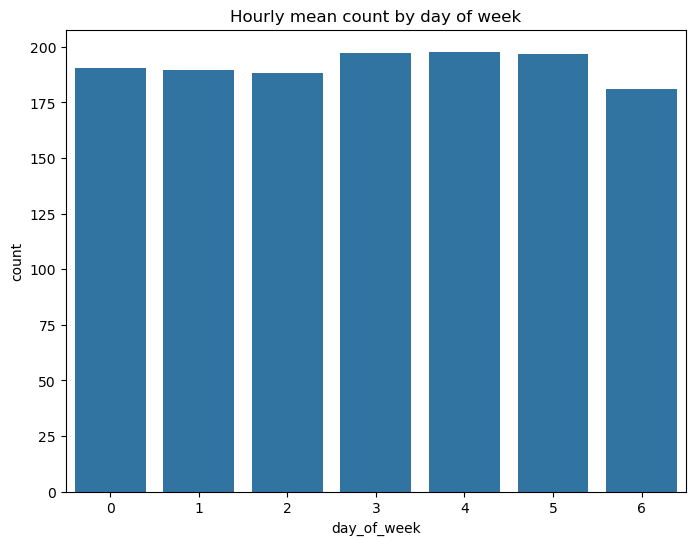

In [101]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x = 'day_of_week', y='count', errorbar=None)
plt.title('Hourly mean count by day of week')
plt.show()

# 막대그래프만 보았을때는 큰차이가 없어보인다.

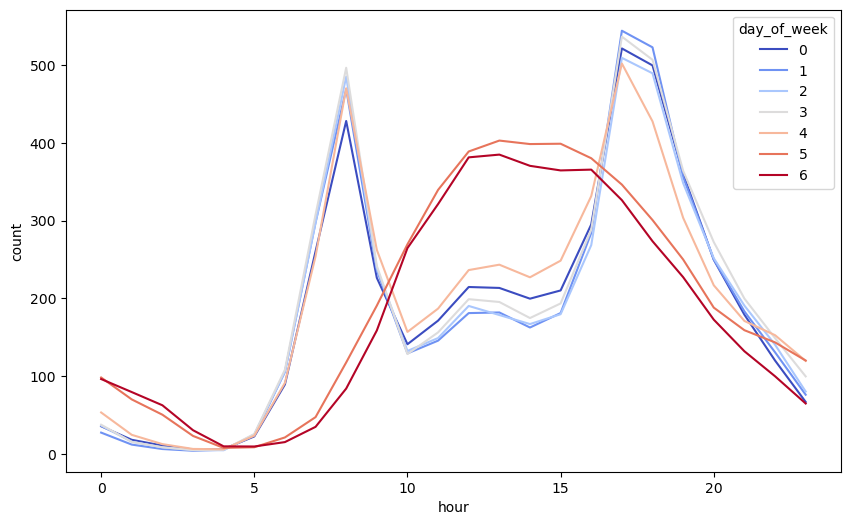

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='day_of_week', errorbar=None, palette='coolwarm')
plt.show()

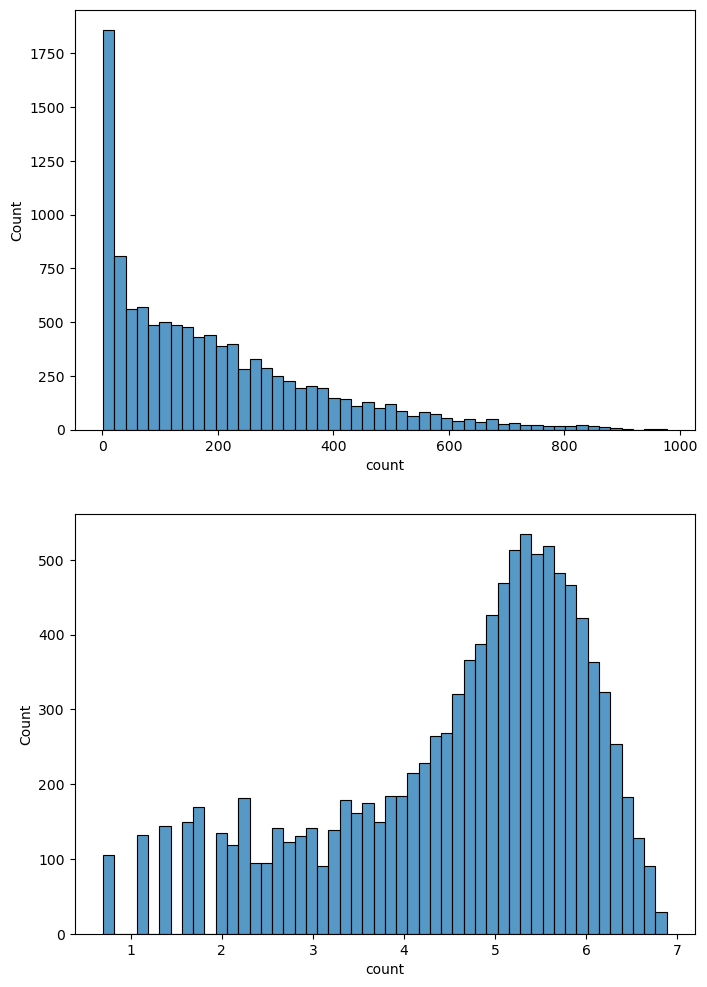

In [103]:
# 타겟변수의 정규성을 위해 로그변환 

fig, axes = plt.subplots(2, 1, figsize = (8, 12))
sns.histplot(train_df['count'], ax = axes[0], bins=50)
sns.histplot(np.log1p(train_df['count']), ax = axes[1], bins = 50)
plt.show()

#### 선형회귀모형 --> 랜덤포레스트 모델로 변환

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

model = RandomForestRegressor(random_state=42)

In [105]:
def separate_train(df): # 'count' 피쳐를 y로 구분
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df): # 'count' 피쳐를 y로 구분
    X_test = df.drop('datetime', axis=1)
    return X_test


In [106]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


Validation Data RMSLE: 0.30474


<Axes: xlabel='humidity', ylabel='Count'>

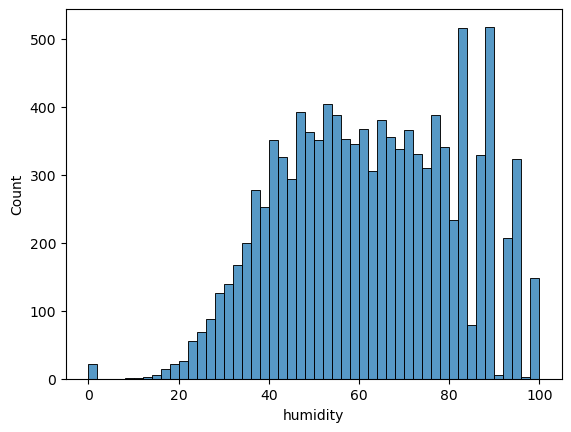

In [107]:
## 습도 데이터 전처리

sns.histplot(train_df['humidity'], bins=50)

In [108]:
train_df.loc[train_df['humidity'] == 0, 'humidity'] = train_df.humidity.mean()

C:\Users\KJY\AppData\Local\Temp\ipykernel_23292\2178835215.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '61.88645967297446' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df['humidity'] == 0, 'humidity'] = train_df.humidity.mean()


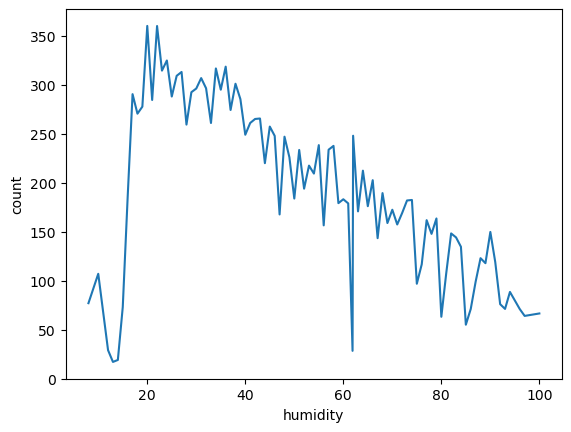

In [109]:
sns.lineplot(data = train_df, x='humidity', y='count', errorbar=None)
plt.show()

In [110]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


Validation Data RMSLE: 0.30472


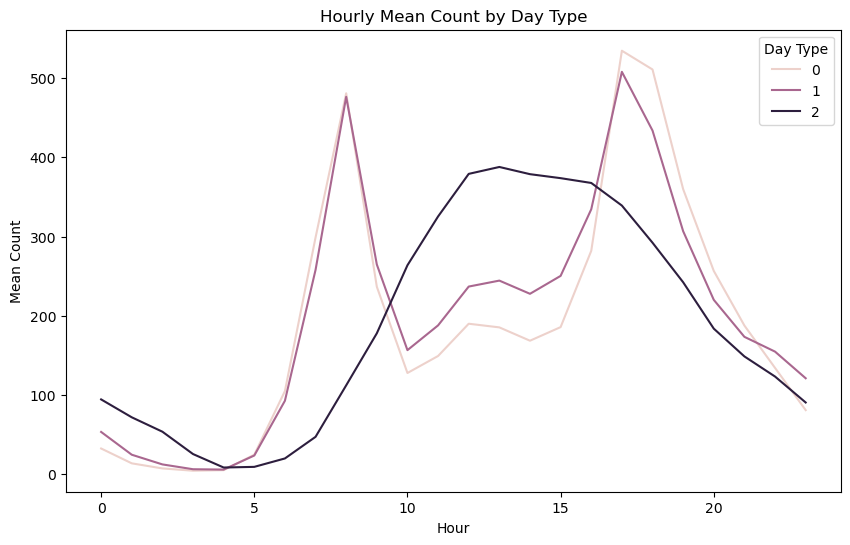

Validation Data RMSLE: 0.30277


In [111]:
train_df['daytype'] = 0
train_df.loc[train_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
train_df.loc[train_df['workingday'] == 0, 'daytype'] = 2 # 비영업일

test_df['daytype'] = 0
test_df.loc[test_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
test_df.loc[test_df['workingday'] == 0, 'daytype'] = 2 # 비영업일

plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='daytype', errorbar=None)
plt.title('Hourly Mean Count by Day Type')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Day Type')
plt.show()

train_df = train_df.drop(columns='workingday')
test_df = test_df.drop(columns='workingday')

X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


#### 평균값 파생피처 만들기

In [112]:
groupby_df = train_df.groupby('hour')['count'].mean().reset_index()
groupby_df.columns = ['hour', 'mean_count_by_hour']
groupby_df.head()

,hour,mean_count_by_hour
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240


In [113]:
train_df = train_df.merge(groupby_df, on='hour', how='left')
test_df = test_df.merge(groupby_df, on='hour', how='left')


In [114]:
groupby_df = train_df.groupby(['daytype', 'hour'])['count'].mean().reset_index()
groupby_df.columns = ['daytype', 'hour', 'mc_daytype_hour']


In [115]:
train_df = train_df.merge(groupby_df, on=['daytype', 'hour'], how='left')
test_df = test_df.merge(groupby_df, on=['daytype', 'hour'], how='left')


In [117]:
train_df.head()
test_df.head()


,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,day_of_week,daytype,mean_count_by_hour,mc_daytype_hour
0,2011-01-20 00:00:00,1,0,1,10.66,11.365,56,26.0027,2011,1,20,0,3,0,55.138462,32.552419
1,2011-01-20 01:00:00,1,0,1,10.66,13.635,56,0.0000,2011,1,20,1,3,0,33.859031,13.821862
2,2011-01-20 02:00:00,1,0,1,10.66,13.635,56,0.0000,2011,1,20,2,3,0,22.899554,7.407407
3,2011-01-20 03:00:00,1,0,1,10.66,12.880,56,11.0014,2011,1,20,3,3,0,11.757506,4.502183
4,2011-01-20 04:00:00,1,0,1,10.66,12.880,56,11.0014,2011,1,20,4,3,0,6.407240,5.225000


In [118]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


Validation Data RMSLE: 0.30296


#### 변수선택

In [119]:
drop_features = ['day', 'month', 'atemp']

train_df = train_df.drop(drop_features, axis=1)
test_df = test_df.drop(drop_features, axis=1)


In [120]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


Validation Data RMSLE: 0.31260


In [121]:
from sklearn.model_selection import GridSearchCV

X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼 파라미터 초기 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [4, 6, 8],
}


In [122]:
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, np.log1p(y_train))


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [50, 100, 200]})

In [123]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 200}


In [124]:
best_model = grid_search.best_estimator_


In [125]:
y_valid_pred = best_model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

y_test_pred = best_model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


Validation Data RMSLE: 0.30863
